In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import string
import pickle
import seaborn as sns
from textblob import TextBlob

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve

from matplotlib.pyplot import figure

### Random Forest Classification with Unbalanced data

In [9]:
# Read the dataset
df = pd.read_csv("tweets_df_with_gender.csv")
df["Tweet"] = df["Text"]
df["Target"] = df["Gender"]
df = df[["Handle","Tweet", "Target"]]
df = df.replace(to_replace = "F", value = 1)
df = df.replace(to_replace = "M", value = 0)


df1 = df.copy(deep=True)
df1 = df1.replace(to_replace = 0, value = 3)
df1 = df1.replace(to_replace = 1, value = 0)
df1 = df1.replace(to_replace = 3, value = 1)


# merge datasets
df = pd.concat([df, df1], ignore_index=True)
len(df)

50330

In [12]:
df.head(-10)

,Handle,Tweet,Target
0,@AngiMaryssa,Blackwell is great As a lawyer you have to bec...,0
1,@thiccbb69,math dumb af if ymxb then ytf dont she love me,1
2,@JaredEHalpern,Wow he was a hell of an engineer Grant Imahara...,0
3,@BobBrigham,Matt Kelley is so bad he thinks coronavirus is...,0
4,@AlaskanTzar,he was,0
...,...,...,...
50315,@ElSandifer,My view on this has evolved especially David p...,1
50316,@ShimadaMinami_,she is very slow when it comes to Japanese gra...,0
50317,@Sisyphus_smokes,and 2 othersOr a political scientist She a c...,0
50318,@HumanBe64947926,and many ways he did He learned from the sc...,1


In [13]:
X = df.iloc[:,1:].values
y = df.iloc[:,2:].values

In [14]:
documents = []

from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen])) 
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)  
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)   
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)   
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)   
    # Converting to Lowercase
    document = document.lower()  
    
    # Lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

In [15]:
# Create vocabularies
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(documents).toarray()

In [16]:
# Split train and test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

In [17]:
# Apply the classifier using the hyperparameters defined in part 1
classifier = RandomForestClassifier(n_estimators=900, max_depth = 200, min_samples_split = 2, min_samples_leaf = 1, random_state=0)
model = classifier.fit(X_train, y_train.ravel()) 

y_pred = model.predict(X_test)

In [18]:
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred))
print(" ")
print(" ")
print("Classification report:") 
print(classification_report(y_test,y_pred))
print(" ")
print("Accuracy score:", accuracy_score(y_test, y_pred))

Confusion matrix:
[[ 556 4477]
 [4474  559]]
 
 
Classification report:
              precision    recall  f1-score   support

           0       0.11      0.11      0.11      5033
           1       0.11      0.11      0.11      5033

    accuracy                           0.11     10066
   macro avg       0.11      0.11      0.11     10066
weighted avg       0.11      0.11      0.11     10066

 
Accuracy score: 0.11076892509437711


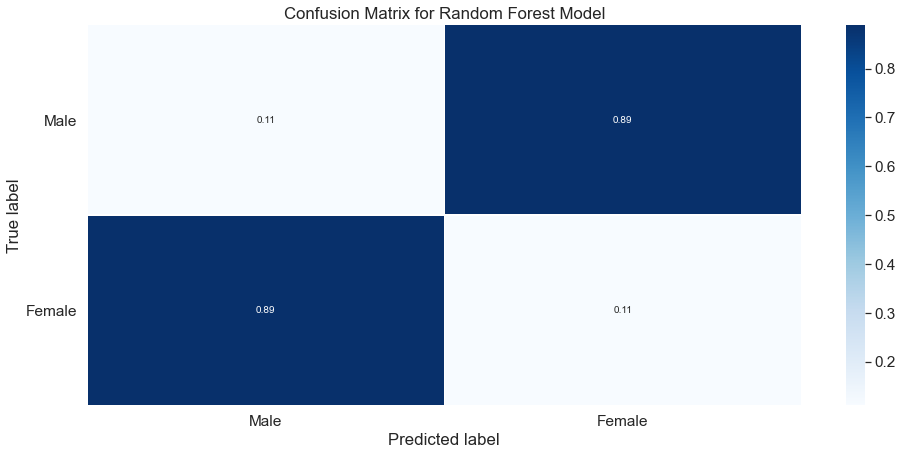

In [19]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2)

# Add labels to the plot
class_names = ['Male', 'Female']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks2, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# 